# Desafio IPQ - Análise de Microdados SINASC 2016 

## Importação das Bibliotecas e Carregamento dos Dados


In [1]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime

In [2]:
# Importação dos dados
sinasc_dados = '../data/sinasc_2016.csv'
municipios_uf = '../data/municipios.csv'

# Carregar dados em data frames
sinasc_df = pd.read_csv(sinasc_dados, sep=',', encoding='ISO-8859-1')
municipios_df = pd.read_csv(municipios_uf, sep=';', encoding='ISO-8859-1')

In [3]:
# Exibir as primeiras linhas dos dados em sinasc_df para verificação
sinasc_df.head(70)

,DTNASC,CODMUNNASC,CODMUNRES,DTNASCMAE,CODESTAB,RACACORMAE,LOCNASC,PARTO,PESO,ESCMAE2010,ESTCIVMAE,GESTACAO,SEMAGESTAC,SERIESCMAE,IDADEPAI,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,CONSPRENAT
0,19022016,110001,110001,18121987.0,2679477.0,1.0,1,1.0,3100,2.0,2.0,5.0,39.0,8.0,24.0,2.0,2.0,3.0,1.0,9.0
1,22022016,110001,110001,17011998.0,NaN,5.0,4,1.0,1800,1.0,5.0,5.0,37.0,3.0,20.0,1.0,2.0,3.0,1.0,5.0
2,13022016,110001,110001,15021986.0,2679477.0,5.0,1,1.0,3545,1.0,5.0,5.0,39.0,NaN,38.0,1.0,2.0,3.0,1.0,7.0
3,5022016,110001,110001,7041986.0,2679477.0,5.0,1,1.0,3550,1.0,9.0,5.0,39.0,3.0,NaN,1.0,2.0,3.0,1.0,6.0
4,25022016,110001,110001,18121989.0,2679477.0,1.0,1,1.0,2obeso565,3.0,5.0,5.0,38.0,NaN,34.0,1.0,2.0,3.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,3022016,110002,110002,NaN,2515598.0,NaN,1,2.0,2obeso820,NaN,5.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2022016,110002,110002,NaN,2515598.0,NaN,1,2.0,4950,NaN,5.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2012016,110002,110094,NaN,2515504.0,NaN,1,2.0,2obeso860,NaN,5.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2012016,110002,110002,NaN,2515504.0,NaN,1,2.0,3780,NaN,4.0,5.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Exibir as primeiras linhas dos dados em municipios_df para verificação
municipios_df.head()

,CÓDIGO DO MUNICÍPIO - TOM,CÓDIGO DO MUNICÍPIO - IBGE,MUNICÍPIO - TOM,MUNICÍPIO - IBGE,UF
0,1,1100106,GUAJARÁ-MIRIM,Guajará-Mirim,RO
1,2,1100379,ALTO ALEGRE DOS PARECIS,Alto Alegre dos Parecis,RO
2,3,1100205,PORTO VELHO,Porto Velho,RO
3,4,1100452,BURITIS,Buritis,RO
4,5,1100122,JI-PARANÁ,Ji-Paraná,RO


## Sumário
1. [Distribuição do Código e Nome da UF de Nascimento](#1-distribuicao-do-codigo-e-nome-da-uf-de-nascimento)
2. [Número de Municípios por UF de Nascimento](#2-numero-de-municipios-por-uf-de-nascimento)
3. [Três Menores e Três Maiores Idades das Mães](#3-tres-menores-e-tres-maiores-idades-das-maes)
4. [Distribuição de Frequência da Idade das Mães na Bahia](#4-distribuicao-de-frequencia-da-idade-das-maes-na-bahia)
5. [Distribuição da Variável ‘Peso’](#5-distribuicao-da-variavel-peso)
6. [Bebês Pesando Menos de 2000 Gramas](#6-bebes-pesando-menos-de-2000-gramas)
7. [Estabelecimentos de Saúde por UF](#7-estabelecimentos-de-saude-por-uf)
8. [Crianças Nascidas em Hospital na Bahia](#8-criancas-nascidas-em-hospital-na-bahia)
9. [Crianças Nascidas em Casa na Bahia](#9-criancas-nascidas-em-casa-na-bahia)
10. [Distribuição de Nascimentos por Mês na Bahia](#10-distribuicao-de-nascimentos-por-mes-na-bahia)
11. [Distribuição de Escolaridade de Mães Solteiras, Negras e Pardas](#11-distribuicao-de-escolaridade-de-maes-solteiras-negras-e-pardas)
12. [Porcentagem de Mulheres Casadas com Parto Vaginal Precoce](#12-porcentagem-de-mulheres-casadas-com-parto-vaginal-precoce)
13. [Porcentagem de Mulheres Casadas com Parto Cesárea Precoce](#13-porcentagem-de-mulheres-casadas-com-parto-cesarea-precoce)


## 1. Distribuição do Código e Nome da UF de Nascimento

In [5]:
# municipios_df.head()
# sinasc_df.head()

# Extrair o código da UF a partir do código do munícipio 'CÓDIGO DO MUNICÍPIO - IBGE'
municipios_df['UF_CODIGO'] = municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'].astype(str).str[:2]

In [6]:
# Padronizar o formato dos códigos
# Garantir que CODMUNNASC tenha 6 posições
sinasc_df['CODMUNNASC'] = sinasc_df['CODMUNNASC'].astype(str).str.zfill(6)

# Remover a unidade do CÓDIGO DO MUNICÍPIO - IBGE e garantir 6 posições
municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'] = municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'].astype(str).str[:-1]
municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'] = municipios_df['CÓDIGO DO MUNICÍPIO - IBGE'].str.zfill(6)

In [7]:
# Fazer a junção das duas tabelas para incluir código e nome de cada UF
sinasc_df = sinasc_df.merge(
    municipios_df[['CÓDIGO DO MUNICÍPIO - IBGE', 'UF', 'UF_CODIGO']],
    left_on='CODMUNNASC',
    right_on='CÓDIGO DO MUNICÍPIO - IBGE',
    how='left'
)
sinasc_df.rename(columns={'UF': 'UF_NOME'}, inplace=True)

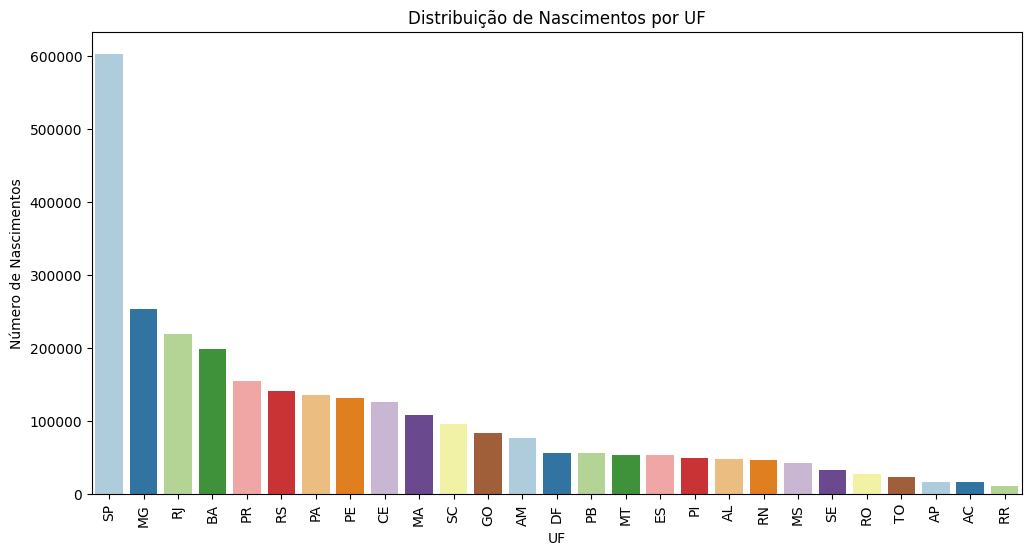

In [8]:
# Contar a distribuição das UFs
uf_distribuicao = sinasc_df['UF_NOME'].value_counts().reset_index()
uf_distribuicao.columns = ['UF', 'Número de Nascimentos']

# Definir uma paleta de cores com o número correto de cores
paleta = sns.color_palette('Paired', n_colors=len(uf_distribuicao))

# Plotar a distribuição
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UF', y='Número de Nascimentos', data=uf_distribuicao, palette=paleta, hue='UF', legend=False)
plt.xticks(rotation=90)
plt.xlabel('UF')
plt.ylabel('Número de Nascimentos')
plt.title('Distribuição de Nascimentos por UF')
plt.show()

In [9]:
sinasc_df.columns.values

array(['DTNASC', 'CODMUNNASC', 'CODMUNRES', 'DTNASCMAE', 'CODESTAB',
       'RACACORMAE', 'LOCNASC', 'PARTO', 'PESO', 'ESCMAE2010',
       'ESTCIVMAE', 'GESTACAO', 'SEMAGESTAC', 'SERIESCMAE', 'IDADEPAI',
       'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI',
       'CONSPRENAT', 'CÓDIGO DO MUNICÍPIO - IBGE', 'UF_NOME', 'UF_CODIGO'],
      dtype=object)

## 2. Número de Municípios por UF de Nascimento

In [10]:
# Contar a distribuição de municípios por UF
coluna_in_uf_nome = sinasc_df.groupby('UF_NOME')['CODMUNNASC'].nunique().reset_index()
coluna_in_uf_nome.columns = ['UF', 'Número de Municípios']

In [11]:
# Definir uma paleta de cores com o número correto de cores
paleta = sns.color_palette('Paired', n_colors=len(coluna_in_uf_nome))

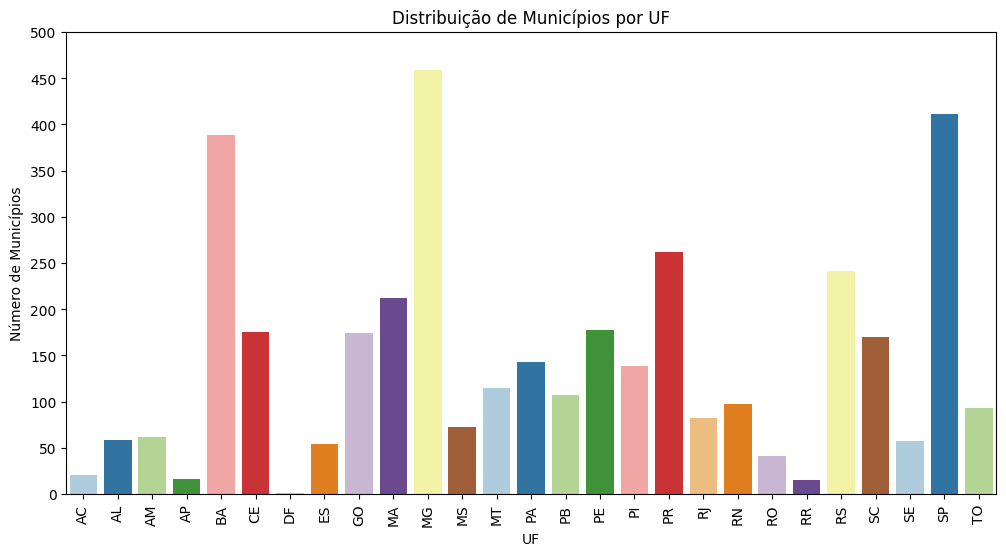

In [12]:
# Plotar a distribuição
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UF', y='Número de Municípios', data=coluna_in_uf_nome, palette=paleta, hue='UF', legend=False)
plt.xticks(rotation=90)
plt.xlabel('UF')
plt.ylabel('Número de Municípios')
plt.title('Distribuição de Municípios por UF')

# Definir os ticks do eixo y com intervalo de 50
max_y = coluna_in_uf_nome['Número de Municípios'].max()
plt.yticks(np.arange(0, max_y + 50, 50))

plt.show()

## 3. Três Menores e Três Maiores Idades das Mães

In [13]:
# Função para ajustar o formato da data
def format_date(value):
    if pd.isna(value):
        return pd.NaT  # Retorna um valor nulo para datas inválidas
    try:
        # Converter para string, remover o '.0' e garantir 8 dígitos
        date_str = str(int(value)).zfill(8)
        return pd.to_datetime(date_str, format='%d%m%Y')
    except ValueError:
        return pd.NaT  # Retorna um valor nulo se houver um erro de conversão

# Aplicar a função para converter a coluna DTNASCMAE
sinasc_df['DTNASCMAE'] = sinasc_df['DTNASCMAE'].apply(format_date)

# Converter a coluna DTNASC diretamente
sinasc_df['DTNASC'] = pd.to_datetime(sinasc_df['DTNASC'], format='%d%m%Y', errors='coerce')

# Calcular a idade das mães no ano de 2016
sinasc_df['IDADEMAE_2016'] = 2016 - sinasc_df['DTNASCMAE'].dt.year

# Ajustar a idade para os casos onde o aniversário ainda não ocorreu em 2016 com base na data de nascimento do bebê
sinasc_df['IDADEMAE_2016'] = sinasc_df.apply(
    lambda row: row['IDADEMAE_2016'] - 1 if pd.notna(row['DTNASCMAE']) and pd.notna(row['DTNASC']) and (row['DTNASCMAE'].month, row['DTNASCMAE'].day) > (row['DTNASC'].month, row['DTNASC'].day) else row['IDADEMAE_2016'],
    axis=1
)

In [14]:
# Selecionar e exibir as três maiores idades das mães
tres_maiores_idades = sinasc_df.nlargest(3, 'IDADEMAE_2016')
print(tres_maiores_idades[['IDADEMAE_2016', 'DTNASCMAE']])

         IDADEMAE_2016  DTNASCMAE
1386430           72.0 1944-04-26
19552             65.0 1951-03-01
565818            64.0 1951-05-27


In [15]:
# Selecionar e exibir as três menores idades das mães
tres_menores_idades = sinasc_df.nsmallest(3, 'IDADEMAE_2016')
print(tres_menores_idades[['IDADEMAE_2016', 'DTNASCMAE']])

        IDADEMAE_2016  DTNASCMAE
873067           -1.0 2016-04-04
873189           -1.0 2016-04-27
926018           -1.0 2016-03-29


In [16]:
# Verificar a linha original no DataFrame utilizando o índice
print("Dados originais das três menores idades:")
for idx in tres_menores_idades.index:
    original_row = sinasc_df.loc[idx]
    print(f"Índice: {idx}")
    print(original_row)
    print()

print("Dados originais das três maiores idades:")
for idx in tres_maiores_idades.index:
    original_row = sinasc_df.loc[idx]
    print(f"Índice: {idx}")
    print(original_row)
    print()

Dados originais das três menores idades:
Índice: 873067
DTNASC                        2016-03-31 00:00:00
CODMUNNASC                                 421660
CODMUNRES                                  421190
DTNASCMAE                     2016-04-04 00:00:00
CODESTAB                                2555646.0
RACACORMAE                                    1.0
LOCNASC                                         1
PARTO                                         2.0
PESO                                         3825
ESCMAE2010                                    2.0
ESTCIVMAE                                     1.0
GESTACAO                                      5.0
SEMAGESTAC                                   39.0
SERIESCMAE                                    8.0
IDADEPAI                                     23.0
TPAPRESENT                                    1.0
STTRABPART                                    2.0
STCESPARTO                                    2.0
TPNASCASSI                                  

### Nessa análise pude observar inconsistências nas três menores idades pois foram negativas. Abaixo aumento a pesquisa para as 50 menores idades para poder observar uma faixa maior

In [17]:
# Selecionar e exibir as 50 menores idades das mães
tres_menores_idades = sinasc_df.nsmallest(50, 'IDADEMAE_2016')
print(tres_menores_idades[['IDADEMAE_2016', 'DTNASCMAE']])

         IDADEMAE_2016  DTNASCMAE
873067            -1.0 2016-04-04
873189            -1.0 2016-04-27
926018            -1.0 2016-03-29
952486            -1.0 2016-07-21
1063531           -1.0 2016-06-13
1278359           -1.0 2016-06-05
2380327           -1.0 2016-10-22
857815             0.0 2016-03-31
1918960            0.0 2016-05-03
2163500            8.0 2008-06-02
936464             9.0 2006-03-18
1098188            9.0 2006-06-30
2125187            9.0 2007-05-02
82106             10.0 2006-02-10
192086            10.0 2005-02-26
288454            10.0 2005-05-14
295204            10.0 2005-11-17
669157            10.0 2005-06-20
893073            10.0 2005-07-28
1232821           10.0 2006-01-31
1524118           10.0 2006-06-20
1537450           10.0 2005-11-03
1554676           10.0 2005-08-23
1589509           10.0 2006-05-16
1688200           10.0 2005-08-31
1917489           10.0 2006-07-21
2062396           10.0 2006-04-19
2073297           10.0 2006-06-28
2143051       

In [18]:
# Selecionar e exibir as 50 maiores idades das mães
tres_maiores_idades = sinasc_df.nlargest(50, 'IDADEMAE_2016')
print(tres_maiores_idades[['IDADEMAE_2016', 'DTNASCMAE']])

         IDADEMAE_2016  DTNASCMAE
1386430           72.0 1944-04-26
19552             65.0 1951-03-01
565818            64.0 1951-05-27
590198            64.0 1951-10-22
179232            63.0 1953-02-06
767026            63.0 1952-07-24
1432928           63.0 1953-04-20
2443974           63.0 1952-11-12
139310            62.0 1953-11-30
2000240           62.0 1954-07-20
2037477           62.0 1954-03-22
2817975           62.0 1954-03-14
505268            61.0 1955-01-20
791610            61.0 1954-12-21
868818            61.0 1954-09-20
1512051           61.0 1954-09-19
1527012           61.0 1955-06-04
2115294           61.0 1955-04-29
2172190           61.0 1955-10-16
2293584           61.0 1955-10-23
2491671           61.0 1955-09-19
243054            60.0 1955-12-26
310040            60.0 1955-08-01
453882            60.0 1955-11-22
835878            60.0 1955-05-04
1003646           60.0 1956-04-17
1087898           60.0 1956-01-31
2090446           60.0 1956-04-30
256093        

## 4. Qual é a distribuição de frequência da idade das mães na Bahia?

In [27]:
# Selecionar nascimentos no estado da Bahia
nascidos_na_bahia = sinasc_df[sinasc_df['UF_CODIGO'] == '29']

In [43]:
# Calcular a distribuição de frequencia da idade das mães no estado da Bahia
frequencia_idade_bahia = nascidos_na_bahia['IDADEMAE_2016'].value_counts().sort_index()

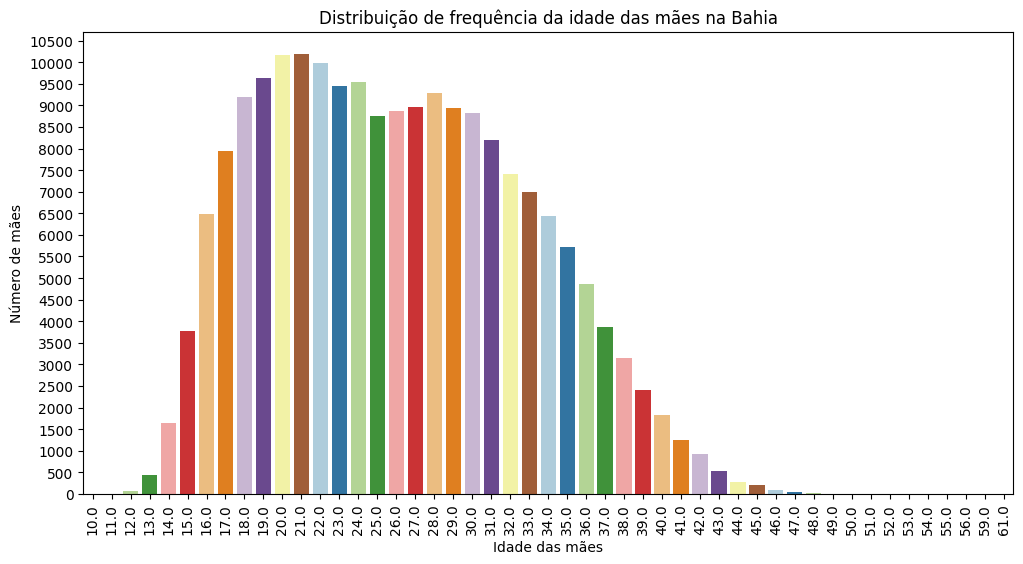

In [44]:
# Converter a série de frequência em um DataFrame para plotagem
frequencia_idade_bahia_df = frequencia_idade_bahia.reset_index()
frequencia_idade_bahia_df.columns = ['Idade das mães', 'Número de mães']

# Plotar a distribuição
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Idade das mães', y='Número de mães', data=frequencia_idade_bahia_df, palette='Paired', hue='Idade das mães', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Idade das mães')
plt.ylabel('Número de mães')
plt.title('Distribuição de frequência da idade das mães na Bahia')

# # Definir os ticks do eixo y com intervalo de 50
max_y = frequencia_idade_bahia_df['Número de mães'].max()
plt.yticks(np.arange(0, max_y + 500, 500))

plt.show()